Metoda 1. Generowanie 100 punktów z przedziału [-100,100] 

In [2]:
from random import uniform, randint
import matplotlib.pyplot as plt
import numpy as np
from time import time
import math
import copy
from IPython import display
from functools import cmp_to_key

# Zbiory podstawowe

In [3]:
def First_generator(n=100):
    return [ (uniform(-100,100),uniform(-100,100)) for _ in range(n) ]

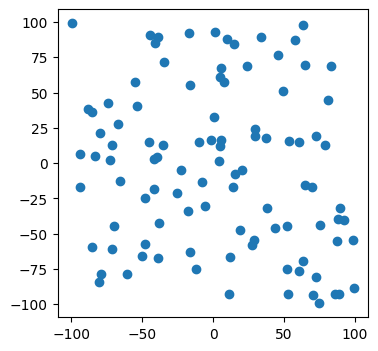

In [4]:
points1 = First_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points1))
# plt.show()
plt.savefig("100_from_100_to_100.png")

Metoda 2. Okrąg o promieniu 10 i centrum (0,0)

In [5]:
def Second_generator(n=100):
    result = [ ]
    for _ in range(n):
        theta = uniform(0,2*np.pi)
        R = 10
        result.append((R*np.cos(theta),R*np.sin(theta)))
    return result

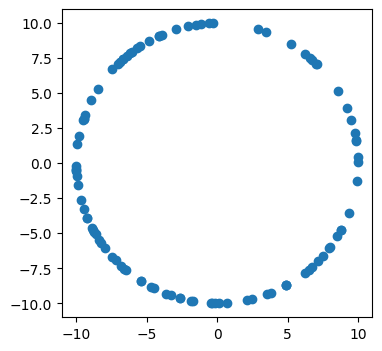

In [6]:
points2 = Second_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points2))
plt.savefig("Circle_of_radius_10_center_0,0.png")


Generator 3. Boki prostokąta 

In [7]:
def Third_generator(n=100):
    result = []
    for _ in range(n):
        x = uniform(-10,10)
        if randint(0,2) % 2 == 0: 
            result.append((x,10*((-1)**randint(0,1))))
        else:
            result.append((10*((-1)**randint(0,1)),x))

    return result

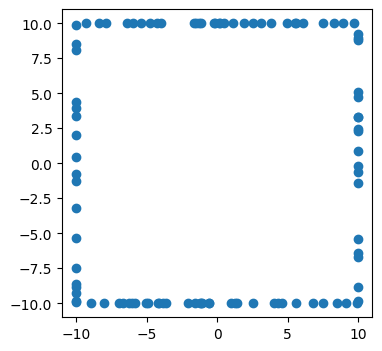

In [8]:
points3 = Third_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points3))
# plt.show()
plt.savefig("10x10_square.png")

In [9]:
def Fourth_generator():
    result = [(0,0),(10,0),(0,10),(10,10)]
    for _ in range(25):
        x = uniform(0,10)
        if randint(0,2) % 2 == 0: 
            result.append((x,0))
        else:
            result.append((0,x))
    for _ in range(20):
        x = uniform(0,10)
        orientation = randint(0,1)
        result.append((x,10*orientation+x*(-1)**orientation))
    return result

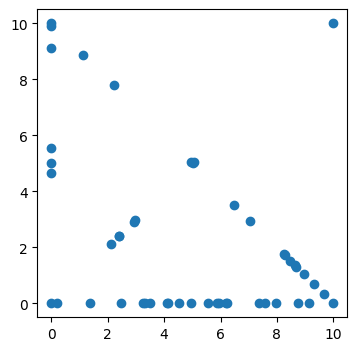

In [10]:
points4 = Fourth_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points4))
plt.savefig("4_corners_OX_OY_diagonal.png")

# Funkcje do zapisywania i wizualizacji danych

In [11]:
def create_tex_table(table_name,data):
    
    latex_template = r"""
\begin{table}[H]
    \renewcommand{\tablename}{Tabela}

    \centering
    \small
    \caption{Tabela różnic czasów obliczeń}
    \resizebox{\textwidth}{!}{
    \begin{tabular}{@{}lllc@{}}
        \toprule
                Ilość punktów & Algorytm Grahama &  Algorytm Jarvisa & Punkty na otoczce wypukłej 
        \\ \midrule
"""
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    for row in data:
        value_G = row['Graham']
        value_J = row['Jarvis']
        unit_G = ' \\mu s'
        unit_J = ' \\mu s'
        if int(value_G) >= 1000:
            unit_G = ' ms'
            value_G /= 1000
        if int(value_J) >= 1000:
            unit_J = ' ms'
            value_J /= 1000
        if int(value_G) >= 1000:
            unit_G = ' s'
            value_G /= 1000
        if int(value_J) >= 1000:
            unit_J = ' s'
            value_J /= 1000

        graham_time = wrap(value_G) + unit_G
        jarvis_time = wrap(value_J) + unit_J
        latex_template += f"        {row['Name']} & {graham_time} & {jarvis_time} & {row['Points']}\\\\ \n"

    latex_template += r"""        \bottomrule
    \end{tabular}
}
    \label{table:generator4}
    \small
    \normalsize
\end{table}
"""

    output_filename = f"{table_name}.tex"
    with open(output_filename, "w") as f:
        f.write(latex_template)

    print(f"LaTeX table has been written to {output_filename}")


In [12]:
def csv_dump(table_name,data):
    
    content = "Ilość punktów dla zbioru; Czas obliczeń dla algorytmu Grahama (μs);Czas obliczeń dla algorytmu Jarvisa (μs);Punkty na otoczce\n"
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    for row in data:
        value_G = row['Graham']
        value_J = row['Jarvis']
        graham_time = wrap(value_G)
        jarvis_time = wrap(value_J)
        content = content + f"{row['Name']};{graham_time};{jarvis_time};{row['Points']}\n"
    output_filename = f"{table_name}.csv"
    with open(output_filename, "w") as f:
        f.write(content)

    print(f"CSV data table has been written to {output_filename}")

def create_tex_table_n(table_name,data):
    
    latex_template = r"""
\begin{table}[H]
    \renewcommand{\tablename}{Tabela}

    \centering
    \small
    \caption{Tabela różnic czasów obliczeń dla algorytmu Grahama i Jarvisa dla zmodyfikowanego zbioru}
    \resizebox{\textwidth}{!}{
    \begin{tabular}{@{}lllc@{}}
        \toprule
                Ilość punktów & Algorytm Grahama &  Algorytm Jarvisa & Punkty na otoczce wypukłej 
        \\ \midrule
"""
    def wrap(number):
        return str(round(number,4)).replace('.',',').replace(",0 ","")
    for row in data:
        value_G = row['Graham']
        value_J = row['Jarvis']
        unit_G = ' \\mu s'
        unit_J = ' \\mu s'
        if int(value_G) >= 1000:
            unit_G = ' ms'
            value_G /= 1000
        if int(value_J) >= 1000:
            unit_J = ' ms'
            value_J /= 1000
        if int(value_G) >= 1000:
            unit_G = ' s'
            value_G /= 1000
        if int(value_J) >= 1000:
            unit_J = ' s'
            value_J /= 1000

        graham_time = wrap(value_G) + unit_G
        jarvis_time = wrap(value_J) + unit_J
        latex_template += f"        {row['Name']} & {graham_time} & {jarvis_time} & {row['Points']}\\\\ \n"

    latex_template += r"""        \bottomrule
    \end{tabular}
}
    \label{table:generator4}
    \small
    \normalsize
\end{table}
"""

    output_filename = f"{table_name}.tex"
    with open(output_filename, "w") as f:
        f.write(latex_template)

    print(f"LaTeX table has been written to {output_filename}")


In [13]:

def show_dump_hull(points, hull, name, adder):
    plt.figure(figsize=(4,4))
    
    # Plot points not in the hull in black
    for point in points:
        if point not in hull:
            plt.plot(point[0], point[1], 'ko', zorder=1)
    
    n = len(hull)
    
    with open(f"{name}_{adder}.txt", 'w') as f:
        for i in range(n):
            f.write(f"From: {hull[i]} to {hull[(i+1)%n]}\n")
            print(f"From: {hull[i]} to {hull[(i+1)%n]}")
            
            x_values = [hull[i][0], hull[(i+1) % n][0]]
            y_values = [hull[i][1], hull[(i+1) % n][1]]
            
            plt.plot(x_values, y_values, 'b-',zorder=2)
    
    with open(f"{name}_{adder}_ans.txt", 'w') as f:
            for i in range(n):
                f.write(str(hull))

    hull_x, hull_y = zip(*hull)
    plt.scatter(hull_x, hull_y, color='green', marker='o',zorder=3) 
    plt.savefig(f"Graham_{name}_{adder}.png")
    plt.close()



In [14]:
E = 1e-20
frame_count = 0
generator = 0


# Funkcje pomocnicze

Punkt o minimalnym y i jak najmniejszym x

In [15]:
def get_min_index(points):
    min_point = (float('inf'),float('inf'))
    indx = 0
    for i,point in enumerate(points):
        if min_point[1] > point[1]:
            indx = i
            min_point = point
        elif min_point[1] == point[1]:
            if point[0] < min_point[0]:
                indx = i
                min_point = point
    return min_point, indx


Wyznacznik macierzy 2x2

In [16]:
def det(a,b,c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

Odległość kwadratowa, aby uniknąć niedokładności związanych z sqrt()

In [17]:
def squared_distance(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

def follows(prev, current, next,det_fun=det):
    d = det_fun(prev, current, next)
    if d < -E:
        return True  
    if d > E:
        return False
    return squared_distance(prev, current) < squared_distance(prev, next)


# Implementacja algorytmu Grahama

In [18]:
def cmp(a, b, c):
    result = -det(a, b, c)
    if abs(result) <= E:
        return squared_distance(a, b) - squared_distance(a, c)
    return result


def Graham_timed(points, det_fun=det):
    result = []
    start = time()
    starting_point, index = get_min_index(points)
    points[0], points[index] = points[index], points[0]
    sorted_points = sorted(points, key=cmp_to_key(lambda middle, last: cmp(starting_point, middle, last)))
    result = [starting_point, sorted_points[1]]
    for point in sorted_points[2:]:
        d = det_fun(result[-2], result[-1], point)
        while len(result) > 1 and d <= E:
            result.pop()
            if len(result) <= 1:
                break
            d = det_fun(result[-2], result[-1], point)
        
        result.append(point)
    finish = time()
    runtime = finish - start
    return result, runtime

# Implementacja algorytmu Jarvisa

In [19]:
def follows(prev, current, next, det_fun=det):
    d = det_fun(prev, current, next)
    if d < -E: 
        return True
    if d > E:   
        return False
    return squared_distance(prev, current) < squared_distance(prev, next)

def choose_next_time(points, last, current, det_fun=det):
    act = current
    for point in points:
        if act == last or follows(last, act, point, det_fun=det_fun):
            act = point
    return act


def Jarvis_timed(points, det_fun=det):
    start = time()
    
    startPoint, index = get_min_index(points)
    hull = [startPoint]
    points[index], points[0] = points[0], points[index]
    current_point = startPoint
    while True:
        next_point = choose_next_time(points, hull[-1], current_point, det_fun=det_fun)
        if next_point == startPoint:
            break
        hull.append(next_point)
        current_point = next_point
    
    finish = time()
    runtime = finish - start
    return hull, runtime



In [20]:
# Define multiple point sets for testing
points_set = [(points1,"Pierwszy"),(points2,"Drugi"),(points3,"Trzeci"),(points4,"Czwarty")]
data = []


for points, name in points_set:

    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    if len(Graham_hull) != len(Jarvis_hull):
        print("================ ROZBIEŻNOŚĆ ================")
        print(f"{len(Jarvis_hull)} {Jarvis_hull}")
        print(f"{len(Graham_hull)} {Graham_hull}")
    data.append({"Name":name , "Graham":time_g*1000000, "Jarvis":time_j*1000000,"Points":len(Graham_hull)})
    create_tex_table("Wyniki",data) 

LaTeX table has been written to Wyniki.tex
LaTeX table has been written to Wyniki.tex
LaTeX table has been written to Wyniki.tex
LaTeX table has been written to Wyniki.tex


In [22]:
# Dla zwiększających się wartości n na przedziale [-1000,1000]
def First_generator_modified(n=100,x_interval=(-1000,1000),y_interval=(-1000,1000)):
    x_min, x_max = x_interval
    y_min, y_max = y_interval
    return [ (uniform(x_min,x_max),uniform(y_min,y_max)) for _ in range(n) ]

# points_set = []

# for i in range(2,7):
#     points_set.append((First_generator_modified(n=pow(10,i)),f"1e{i}"))

# data = []

# for points, name in points_set:
#     print(name)
#     Graham_hull, time_g = Graham_timed(points)
#     Jarvis_hull, time_j = Jarvis_timed(points)
#     if len(Graham_hull) != len(Jarvis_hull):
#         print("================ ROZBIEŻNOŚĆ ================")
#         print(Graham_hull)
#         print(Jarvis_hull) 
#     data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
#     create_tex_table_n("Wyniki_wykładniczo_1",data) 
#     csv_dump("Wyniki_wykładniczo_1",data)

# points_set = []

for i in range(10000,65000,5000):
    print(i)
    points_set.append((First_generator_modified(i),f"{i}"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    if len(Graham_hull) != len(Jarvis_hull):
        print("================ ROZBIEŻNOŚĆ ================")
        print(Graham_hull)
        print(Jarvis_hull) 
    data.append({"Name":name , "Graham":time_g*1000000, "Jarvis":time_j*1000000, "Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_1",data) 
    csv_dump("Wyniki_liniowo_1",data)



10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
Pierwszy
LaTeX table has been written to Wyniki_liniowo_1.tex


UnicodeEncodeError: 'charmap' codec can't encode character '\u03bc' in position 63: character maps to <undefined>

In [23]:
E = 1e-20
def Second_generator_modified(n=100,center=(100,100),R=3000):
    result = [ ]
    x_center, y_center = center
    for _ in range(n):
        theta = uniform(0,2*np.pi)
        result.append((x_center+R*np.cos(theta),y_center+R*np.sin(theta)))
    return result


points_set = []

data = []

points_set = [(Second_generator_modified(100),"100"), (Second_generator_modified(200),"200"),(Second_generator_modified(300),"300")]

for i in range(500,4000,500):
    points_set.append((Second_generator_modified(i),f"{i}"))


points_set.append((Second_generator_modified(6000),"6000"))
points_set.append((Second_generator_modified(10000),"10000"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    data.append({"Name":name , "Graham":time_g*1000000, "Jarvis":time_j*1000000,"Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_2",data) 
    csv_dump("Wyniki_liniowo_2",data)



100
LaTeX table has been written to Wyniki_liniowo_2.tex


UnicodeEncodeError: 'charmap' codec can't encode character '\u03bc' in position 63: character maps to <undefined>

In [24]:
#  wartości na przedziale [-1000,1000]
def Third_generator_modified(n=100,lowerLeft = (-1000,-1000),upperRight = (1000,1000)):
    x_min,y_min = lowerLeft
    x_max,y_max = upperRight 
    result = []
    dy = y_max - y_min
    dx = x_max - x_min
    for _ in range(n):
        point = uniform(0,2*dy+2*dx)
        if point <= dx:
            result.append((x_min+point,y_min))
        elif point <= dy + dx:
            result.append((x_max,y_min+point-dx))
        elif point <= 2*dx + dy:
            result.append((x_min+point-dx-dy,y_max))
        else:
            result.append((x_min,y_min+point-2*dx-dy))
    return result

# points_set = []

# for i in range(1,6):
#     points_set.append((Third_generator_modified(pow(10,i)),f"1e{i}"))

# data = []

# for points, name in points_set:
#     print(name)
#     Graham_hull, time_g = Graham_timed(points)
#     Jarvis_hull, time_j = Jarvis_timed(points)
#     if len(Graham_hull) != len(Jarvis_hull):
#         print("================ ROZBIEŻNOŚĆ ================")
#         print(Graham_hull)
#         print(Jarvis_hull) 
#     data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
#     create_tex_table_n("Wyniki_wykładniczo_3",data) 
#     csv_dump("Wyniki_wykładniczo_3",data)
E = 1e-20

points_set = []

for i in range(10000,65000,5000):
    print(i)
    points_set.append((Third_generator_modified(i),f"{i}"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    data.append({"Name":name , "Graham":time_g*1000000, "Jarvis":time_j*1000000,"Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_3",data) 
    csv_dump("Wyniki_liniowo_3",data)



10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
10000
LaTeX table has been written to Wyniki_liniowo_3.tex


UnicodeEncodeError: 'charmap' codec can't encode character '\u03bc' in position 63: character maps to <undefined>

In [25]:
#  wartości na przedziale [-1000,1000]
def Fourth_generator_modified(n=100,m=100,lowerLeft = (-1000,-1000),upperRight = (1000,1000)):
    x_min,y_min = lowerLeft
    x_max,y_max = upperRight 
    result = [(x_min,y_min),(x_min,y_max),(x_max,y_min),(x_max,y_max)]
    dy = y_max - y_min
    dx = x_max - x_min
    for _ in range(n):
        point = uniform(0,dy+dx)
        if point <= dx:
            result.append((x_min+point,y_min))
        else:
            result.append((x_min,y_min+point-dx))

    for _ in range(m):
        point = uniform(0,dy+dx)
        if point <= dx:
            result.append((x_min+point,y_min+point))
        else:
            result.append((x_min+(point-dx),y_max-(point-dx)))
            # continue
    return result

# Graham_visualized(Fourth_generator_modified())

# points_set = []

# for i in range(1,20):
#     points_set.append((Fourth_generator_modified(pow(2,i),pow(2,i)),f"1e{i}"))

# data = []

# for points, name in points_set:
#     print(name)
#     Graham_hull, time_g = Graham_timed(points)
#     Jarvis_hull, time_j = Jarvis_timed(points)
#     if len(Graham_hull) != len(Jarvis_hull):
#         print("================ ROZBIEŻNOŚĆ ================")
#         print(Graham_hull)
#         print(Jarvis_hull) 
#     data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
#     create_tex_table_n("Wyniki_wykładniczo_4",data) 
#     csv_dump("Wyniki_wykładniczo_4",data)

points_set = []


for i in range(10000,65000,5000):
    points_set.append((Fourth_generator_modified(i,int(i*5/4)),f"{i+int(i*5/4)}"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    data.append({"Name":name , "Graham":time_g*1000000, "Jarvis":time_j*1000000,"Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_4",data) 
    csv_dump("Wyniki_liniowo_4",data)

22500
LaTeX table has been written to Wyniki_liniowo_4.tex


UnicodeEncodeError: 'charmap' codec can't encode character '\u03bc' in position 63: character maps to <undefined>

### Wizualizacja algorytmów tworzenia otoczki wypukłej

W celu wizualizacji, należy uruchomić poniższe fragmenty kodu.

#### Kody kolorów

**Algorytm Grahama:**
- <span style="color:blue">**Niebieski**</span> - Punkt nie został rozważony
- <span style="color:red">**Czerwony**</span> - Punkt aktualnie rozważany
- <span style="color:black">**Czarny**</span> - Punkt nie należy do otoczki
- <span style="color:green">**Zielony**</span> - Punkt należy do aktualnej otoczki

**Algorytm Jarvisa:**
- <span style="color:blue">**Niebieski**</span> - Punkt nie został rozważony
- <span style="color:red">**Czerwony**</span> - Punkt aktualnie rozważany jako kandydat
- <span style="color:black">**Czarny**</span> - Punkt został wybrany jako należący do otoczki
- <span style="color:green">**Zielony**</span> - Punkt należy do aktualnej otoczki


Creating hull
From: (74.93955970545474, -99.31106310527444) to (99.15006139930085, -88.27927025788225)
From: (99.15006139930085, -88.27927025788225) to (98.79205723288368, -54.36105391912187)
From: (98.79205723288368, -54.36105391912187) to (83.50020187900842, 68.96338314276932)
From: (83.50020187900842, 68.96338314276932) to (63.134557086121305, 97.57869984484677)
From: (63.134557086121305, 97.57869984484677) to (-99.77828994319924, 99.0738498944809)
From: (-99.77828994319924, 99.0738498944809) to (-94.16902734846761, -16.6427345564649)
From: (-94.16902734846761, -16.6427345564649) to (-80.7125800816777, -84.55820740223578)
From: (-80.7125800816777, -84.55820740223578) to (74.93955970545474, -99.31106310527444)


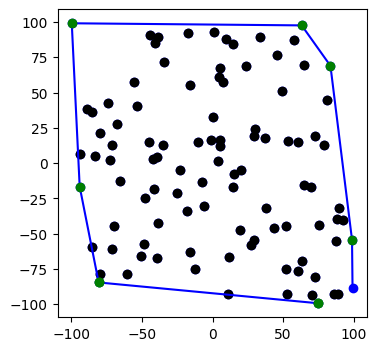

In [40]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import time
from functools import cmp_to_key
from IPython.display import display

E = 1e-9  # Tolerance for floating point comparisons

def cmp(a, b, c):
    result = -det(a, b, c)
    if abs(result) <= E:
        return squared_distance(a, b) - squared_distance(a, c)
    return result

def Graham_visualized(points, det_fun=det):
    global frame_count
    global generator
    frame_count = 0
    result = []
    starting_point, index = get_min_index(points)
    points[0], points[index] = points[index], points[0]
    sorted_points = sorted(points, key=cmp_to_key(lambda middle, last: cmp(starting_point, middle, last)))
    
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_aspect('equal', 'box')
    
    for point in points:
        ax.plot(*point, 'bo', zorder=1)

    result = [starting_point, sorted_points[1]]
    p1, = ax.plot(*starting_point, 'go', zorder=3)
    p2, = ax.plot(*sorted_points[0], 'go', zorder=3)
    first_line, = ax.plot([starting_point[0], sorted_points[0][0]], 
                          [starting_point[1], sorted_points[0][1]], 'b-', zorder=2)
    lines_stack = [first_line]
    points_stack = [p1, p2]

    frames = []
    frames.append((fig,))
    
    print("Creating hull")
    previous_point = starting_point 
    for i, point in enumerate(sorted_points[2:]):  # Start from the third point
        red_point, = ax.plot(*point, 'ro', zorder=4)
        frames.append((fig,))

        # Check and remove non-hull points
        d = det_fun(result[-2], result[-1], point)
        while len(result) > 1 and d <= E:
            points_stack[-1].remove()
            lines_stack[-1].remove()
            lines_stack.pop()
            points_stack.pop()
            ax.plot(*result[-1], 'ko', zorder=1)  # Mark point for removal
            result.pop()
            if len(result) <= 1:
                break
            d = det_fun(result[-2], result[-1], point)

        red_point.remove()  # Remove the red point after processing
        line, = ax.plot([point[0], result[-1][0]], [point[1], result[-1][1]], 'b-', zorder=2)
        lines_stack.append(line)
        result.append(point)

        p, = ax.plot(*point, 'go', zorder=3)  # Add new point to the hull
        points_stack.append(p)

        # Append frame to the animation
        frames.append((fig,))

    # Final connection to close the hull
    line, = ax.plot([result[-1][0], result[0][0]], [result[-1][1], result[0][1]], 'b-', zorder=2)
    ax.plot(*result[-1], 'go', zorder=3)

    frames.append((fig,))
    
    ani = animation.ArtistAnimation(fig, frames, interval=100, repeat_delay=1000, blit=True)
    # ani.save("convex_hull.gif", writer='imagemagick')

    # plt.close(fig)  # Close the plot to prevent it from showing in the notebook
    return result, ani

# Define multiple point sets for testing
points_set = [(points1, "Gen1") ] #, (points3, "Gen3"), (points4, "Gen4")]
adder = "_Graham"

# Create and store animations for each point set
for points, fname in points_set:
    generator += 1
    hull, ani = Graham_visualized(points)

    # Show the animation (stored in `hull`)
    show_dump_hull(points, hull, name=fname, adder=adder)
    HTML(ani.to_jshtml())


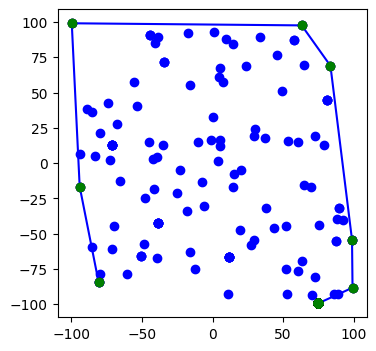

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import copy
from time import time

def choose_next(points, last, current, fig, ax, det_fun=det):
    act = current
    prevline = None
    for point in points:
        p, = ax.plot(*point, 'ro', zorder=2)
        if act == last or follows(last, act, point, det_fun=det_fun):
            if act != current:
                ax.plot(*act, 'bo', zorder=1)
            line, = ax.plot([last[0], act[0]], [last[1], act[1]], 'b-', zorder=2)
            if prevline is not None:
                prevline.remove()
            prevline = line
            act = point
            display.clear_output(wait=True)
            display.display(fig)
            plt.draw()
            plt.pause(0.02)
        p.remove()
    if prevline is not None:
        prevline.remove()
    return act

def Jarvis_visualized(points, det_fun=det):
    points_set = copy.deepcopy(points)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_aspect('equal', 'box')

    # Initial points
    for point in points:
        ax.plot(*point, 'bo', zorder=1)
    
    start, index = get_min_index(points)  
    points[index], points[0] = points[0], points[index]
    hull = [start]
    current_point = start
    
    # Create frames list for FuncAnimation
    animation_frames = []

    def update(frame):
        nonlocal current_point
        # Choose the next point using Jarvis' method
        next_point = choose_next(points_set, hull[-1], current_point, fig, ax, det_fun=det_fun)
        ax.plot(*next_point, 'ko', zorder=1)

        # Check if we've completed the hull
        if next_point == start:
            ax.plot(*next_point, 'go', zorder=3)  # Mark the start point
            return hull

        # Draw the line between the last point and the current one
        line, = ax.plot([next_point[0], hull[-1][0]], [next_point[1], hull[-1][1]], 'b-', zorder=2)
        hull.append(next_point)
        current_point = next_point
        ax.plot(*next_point, 'go', zorder=3)

        # Collect the updated frame for animation
        animation_frames.append((fig,))

        # Return the current hull after adding the new point
        return hull

    # Set up the FuncAnimation
    ani = animation.FuncAnimation(fig, update, frames=100, interval=300, repeat=False, blit=False)

    # Return the animation object for displaying
    plt.close(fig)  # Prevent extra figure from showing up in the notebook
    return ani

# Define multiple point sets for testing
points_set = [(points1, "Gen1")]
adder = "Jarvis"
animations = []

# Create and store animations for each point set
for points, fname in points_set:
    animations.append(Jarvis_visualized(points))

# Display the first animation as an example
HTML(animations[0].to_jshtml())
